In [47]:
import numpy as np
from math import pow
from dataclasses import dataclass
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib notebook
G = 6.67*(10**(-11))

In [48]:
class CosmicBody:
    def __init__ (self, mass = 1, vec_r = np.array([0, 0, 0]), vec_v = ([0, 0, 0]), t = 0, size = 1):
        self.mass = mass
        self.vec_r = vec_r
        self.vec_v = vec_v
        self.t = t
        self.size = size
    def gravitate(self, CosmicBodies, delta_t):
        F = 0
        for i in range(len(CosmicBodies)):
            r = CosmicBodies[i].vec_r - self.vec_r
            len_r = r[0]**2+r[1]**2+r[2]**2
            F+=G*self.mass*CosmicBodies[i].mass*r/pow(len_r, 1.5)
        delta_v = F*delta_t/self.mass
        return delta_v

In [49]:
class System:
    def __init__ (self, CosmicBodies, delta_t = 0.0001):
        self.CosmicBodies = CosmicBodies
        self.delta_t = delta_t
    def add(self, body):
        self.CosmicBodies.append(body)
    def destroy(self, bodies):
        for i in range(len(bodies)):
            bodies[i].mass = 0
            bodies[i].size = 0
            bodeis[i].vec_v = np.array([0, 0, 0])
            self.CosmicBodies.pop(i)
    def step(self):
        inital_v = [x.vec_v for x in self.CosmicBodies]
        change_v = []
        for i in range(1, len(self.CosmicBodies)):
            bodies = self.CosmicBodies[:i] + self.CosmicBodies[i+1:]
            delta_v = self.CosmicBodies[i].gravitate(bodies, self.delta_t)
            self.CosmicBodies[i].vec_v+=delta_v
            change_v.append(delta_v)
        for i in range(1, len(self.CosmicBodies)):
            self.CosmicBodies[i].vec_r+=inital_v[i]*self.delta_t+change_v[i-1]*self.delta_t**2/2
        for i in range(len(self.CosmicBodies)):
            for j in range(len(self.CosmicBodies)):
                if j != i:
                    r = self.CosmicBodies[j].vec_r - self.CosmicBodies[i].vec_r
                    len_r = pow((r[0]**2+r[1]**2+r[2]**2), 0.5)
                    if len_r<=0.0005:
                        bodies = [self.CosmicBodies[j], self.CosmicBodies[i]]
                        self.destroy(bodies)
    def show(self, bodies):
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111, projection='3d')
        t0 = 10
        for t in tqdm(np.arange(0., t0, self.delta_t)):
            angle = 60 + 60 * t / t0
            ax.clear()
            ax.axes.set_xlabel('x')
            ax.axes.set_ylabel('y')
            ax.axes.set_zlabel('z')
            ax.axes.set_xlim3d(-100, 100)
            ax.axes.set_ylim3d(-100, 100)
            ax.axes.set_zlim3d(-100, 100)
            for i in range(len(bodies)):
                if abs(t - bodies[i].t)<0.0001 and bodies[i] not in self.CosmicBodies:
                    self.add(bodies[i])
            list_x, list_y, list_z = [x.vec_r[0] for x in self.CosmicBodies], [y.vec_r[1] for y in self.CosmicBodies], [z.vec_r[2] for z in self.CosmicBodies]
            list_size = [s.size for s in self.CosmicBodies]
            ax.scatter(list_x, list_y, list_z, s = list_size)
            ax.view_init(30 - angle * 0.2, angle)
            fig.canvas.draw()
            self.step()

<IPython.core.display.Javascript object>


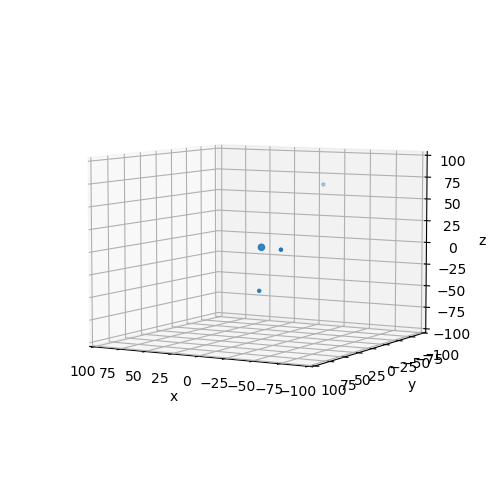

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:28<00:00,  1.13it/s]


In [50]:
d = np.loadtxt('система.csv')
delta_t = d[0, 0]
star = CosmicBody(mass = 10**15, vec_r = np.array([0, 0, 0]), vec_v = np.array([0, 0, 0]), t = 0, size = 20)
planets = [CosmicBody(mass = d[i, 7], vec_r = d[i, :3], vec_v = d[i, 3:6], t = d[i, 6], size = d[i, 8]) for i in range(1, len(d))]
system = System([star], delta_t)
system.show(planets)